In [47]:
from tqdm import tqdm
import pandas as pd

In [48]:
def load_data(path):
    ds = []
    # Read from src
    with open(path, "r") as f:
        lines = f.read().split(">")[1:]
        ds = [0]*len(lines)
        for i, line in enumerate(tqdm(lines)):
            header, seq, sep = line.strip().split("\n")
            ac, kingdom, type_, id_ = header.split("|")
            ds[i] = {
                'header': {
                    'uniprot_ac': ac,
                    'kingdom': kingdom,
                    'type': type_,
                    'id': id_
                },
                'seq': seq,
                'sep': sep
            }
    return ds

In [49]:
ds_train = load_data('../data/train.fasta')
ds_test = load_data('../data/test.fasta')
ds = ds_train + ds_test
df = pd.DataFrame(ds)
df.info()

  0%|          | 0/8811 [00:00<?, ?it/s]

100%|██████████| 8811/8811 [00:00<00:00, 629167.02it/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   header  29101 non-null  object
 1   seq     29101 non-null  object
 2   sep     29101 non-null  object
dtypes: object(3)
memory usage: 682.2+ KB


In [50]:
kingdoms = pd.DataFrame([i['kingdom'] for i in df.get('header')])
sequences = df.get('seq')
classes = df.get('sep')

In [51]:
# Find all items with a specific SP
q = "L"
ds_with_q = [item for item in ds if q in item['sep']]
pd.DataFrame([item['seq'][:len(item) - item['sep'][::-1].index(q) -1] for item in ds_with_q]).value_counts()

0                       
MKKYLALALIAPLLISCS          28
MRYLATLLLSLAVLITAGCG        27
MPLPDFRLIRLLPLAALVLTACS     23
MKLRWFAFLIVLLAGCS           23
MQKNAAHTYAISSLLVLSLTGCA     20
                            ..
MKRFVSVVALSGVVSLAGCV         1
MKRFWAMVCALFLSVSLLLTSCA      1
MKRGIYAVLLVGVLIFSVVASGCI     1
MKRGLTVAVAGAAILVAGLSGCS      1
MKTFKFFTALFATAILTACT         1
Name: count, Length: 1175, dtype: int64

In [52]:
# Which kingdoms shares the most probable 
q = "MQKNAAHTYAISSLLVLSLTGCA"
pd.DataFrame(map(lambda x: x['header']['kingdom'], filter(lambda x: x['seq'][:len(q)] == q, ds))).value_counts()

0       
NEGATIVE    20
Name: count, dtype: int64

In [53]:
ds_with_pep = list(filter(lambda x: x['header']['type'] != "NO_SP", ds))
print("Peptide distribution:", pd.DataFrame(map(lambda x:   
                "S" if "S" in x['sep'] else \
                "T" if "T" in x['sep'] else \
                "P" if "P" in x['sep'] else \
                "L" if "L" in x['sep'] else \
                "N/A", ds_with_pep)).value_counts())

Peptide distribution: 0
S    2957
L    2277
T     592
P      70
Name: count, dtype: int64


In [54]:
print("Type distribution:", pd.DataFrame([x['header']['type'] for x in ds]).value_counts())

Type distribution: 0      
NO_SP      23205
SP          2957
LIPO        2277
TAT          559
PILIN         70
TATLIPO       33
Name: count, dtype: int64


In [55]:
print("Kingdom distribution:", kingdoms.value_counts())

Kingdom distribution: 0       
EUKARYA     23853
NEGATIVE     3547
POSITIVE     1324
ARCHAEA       377
Name: count, dtype: int64


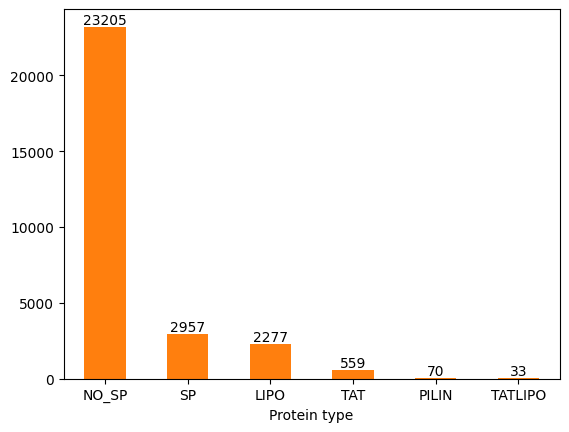

In [56]:
df = pd.DataFrame([x['header']['type'] for x in ds]).value_counts()#.plot.bar(xlabel="Protein type", rot=0)
df.index = [idx[0] for idx in df.index]
df.index
ax = df.plot.bar(xlabel="Protein type", rot=0, color="tab:orange")
for container in ax.containers:
    ax.bar_label(container)

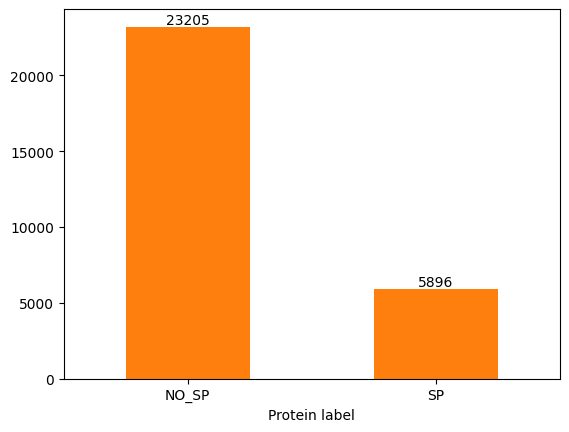

In [57]:
ds_binary = ds.copy()
for d in ds_binary:
    if d['header']['type'] != 'NO_SP':
        d['header']['type'] = 'SP'
df = pd.DataFrame([x['header']['type'] for x in ds_binary]).value_counts()#.plot.bar(xlabel="Protein type", rot=0)
df.index = [idx[0] for idx in df.index]
df.index
ax = df.plot.bar(xlabel="Protein label", rot=0, color="tab:orange")
for container in ax.containers:
    ax.bar_label(container)

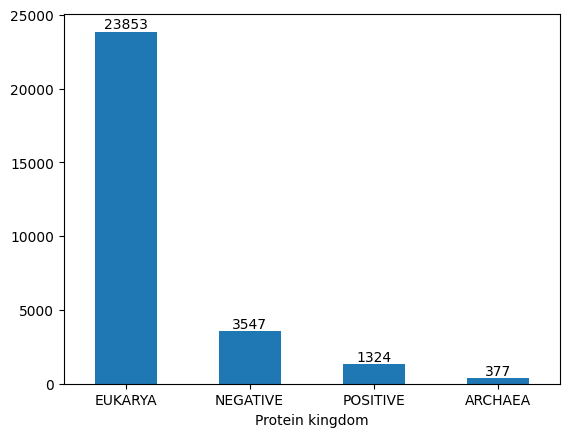

In [58]:
df = kingdoms.value_counts()
df.index = [idx[0] for idx in df.index]
df.index
ax = df.plot.bar(xlabel="Protein kingdom", rot=0)
for container in ax.containers:
    ax.bar_label(container)

In [59]:
ds1 = torch.utils.data.DataLoader(df['seq'])

NameError: name 'torch' is not defined

In [ ]:
next(iter(ds1))

['MAPTLFQKLFSKRTGLGAPGRDARDPDCGFSWPLPEFDPSQIRLIVYQDCERRGRNVLFDSSVKRRNEDI']